In [1]:
import numpy as np 
import pandas as pd 


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
#Hidden layer #3 perceptrons
model.add(Dense(11,activation='sigmoid',input_dim=11)) 
#  Hidden layer with 11 nodes connected to input layer having 11 columns
model.add(Dense(11,activation='sigmoid'))#  Hidden layer with 11 nodes
model.add(Dense(1,activation='sigmoid'))#  Hidden layer with 1 node

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5321 - accuracy: 0.7958 - val_loss: 0.5049 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5074 - accuracy: 0.7958 - val_loss: 0.5034 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7958 - val_loss: 0.5029 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5064 - accuracy: 0.7958 - val_loss: 0.5000 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7958 - val_loss: 0.4991 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7958 - val_loss: 0.4982 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.7958 - val_loss: 0.4977 - val_accuracy: 0.7969

In [17]:
model.layers[0].get_weights() #Weights of input layer

[array([[ 5.69333136e-01,  5.03715016e-02,  1.15833282e-01,
          1.37563376e-02, -3.23369950e-01, -3.10519308e-01,
         -4.78326619e-01,  1.94336966e-01,  4.45009559e-01,
          1.86852932e-01,  1.28213629e-01],
        [ 1.95815638e-01,  6.50464222e-02,  2.50138521e-01,
         -1.76315680e-01, -2.04053462e-01,  4.22684044e-01,
          7.59940818e-02, -9.47397053e-02, -1.02293216e-01,
          3.38801116e-01,  1.74993098e-01],
        [ 3.46909851e-01,  1.71291932e-01,  2.63674259e-01,
          2.11352214e-01, -2.13324755e-01, -2.52148151e-01,
          1.07198413e-02,  2.26429105e-01,  5.22619307e-01,
          4.09949683e-02,  2.05979899e-01],
        [-5.52968979e-02, -2.07922935e-01, -3.93848449e-01,
         -2.15427876e-02, -1.68457359e-01,  3.96700442e-01,
          1.73220977e-01, -2.26951703e-01, -2.93227226e-01,
          3.44904184e-01, -8.15629065e-02],
        [-1.05028279e-01, -1.17220990e-01, -1.35843933e-01,
          5.09702368e-04, -2.87840784e-01, -

In [18]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [19]:
y_pred

array([[0.24287444],
       [0.24287444],
       [0.24428204],
       ...,
       [0.26075295],
       [0.2501196 ],
       [0.24287444]], dtype=float32)

In [20]:
y_pred = y_pred.argmax(axis=-1)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [22]:
history.history   #contains loss, accuracy, val loss, val accuracy for all epochs


{'loss': [0.5320817232131958,
  0.5074484348297119,
  0.5071135759353638,
  0.506413996219635,
  0.5032422542572021,
  0.5023311376571655,
  0.5018240213394165,
  0.5013668537139893,
  0.5009328126907349,
  0.5016357898712158,
  0.5009918808937073,
  0.5003576874732971,
  0.5004007816314697,
  0.500357449054718,
  0.4999120831489563,
  0.4998309314250946,
  0.49973610043525696,
  0.4998073875904083,
  0.49969682097435,
  0.4994691014289856,
  0.4995276927947998,
  0.4993893802165985,
  0.49943116307258606,
  0.49941977858543396,
  0.49929288029670715,
  0.4992793798446655,
  0.4991997480392456,
  0.4992847442626953,
  0.49938279390335083,
  0.49912577867507935,
  0.4993538558483124,
  0.4993438422679901,
  0.4991878569126129,
  0.49946311116218567,
  0.49907004833221436,
  0.49931198358535767,
  0.49909254908561707,
  0.4991852045059204,
  0.49960628151893616,
  0.4991185665130615,
  0.4990673363208771,
  0.49912503361701965,
  0.49940454959869385,
  0.49913856387138367,
  0.4991333782

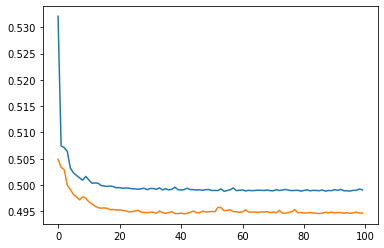

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

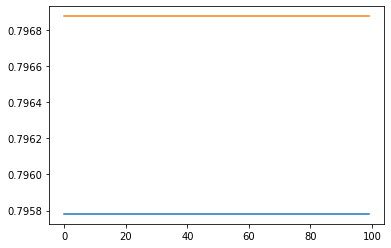

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])